# Praca domowa 6
Alicja Żebiałowicz


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("energy_dataset_.csv",
                delimiter = ",").dropna().reset_index(drop = True)

### 1. Opis zbioru danych

In [38]:
df

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,745.032555,280007.5738,230544.8268,4351.687893,90.791405,4,3.484136e+08,2,1.558508e+07,25234.911810,78.923200,1452
14996,1,15.187023,377340.5803,358547.3589,6792.194696,78.252040,4,2.560179e+08,3,6.866618e+06,15762.519790,54.982974,2598
14997,3,877.539059,480497.3920,214441.6719,4588.725297,58.282928,1,1.300112e+08,2,3.837764e+06,44597.809410,43.915897,2713
14998,7,551.264716,436383.1694,137043.8713,7251.144215,73.573666,2,3.334831e+08,2,5.347706e+06,34363.858000,4.877145,2128


In [39]:
df.dtypes

Type_of_Renewable_Energy           int64
Installed_Capacity_MW            float64
Energy_Production_MWh            float64
Energy_Consumption_MWh           float64
Energy_Storage_Capacity_MWh      float64
Storage_Efficiency_Percentage    float64
Grid_Integration_Level             int64
Initial_Investment_USD           float64
Funding_Sources                    int64
Financial_Incentives_USD         float64
GHG_Emission_Reduction_tCO2e     float64
Air_Pollution_Reduction_Index    float64
Jobs_Created                       int64
dtype: object

In [40]:
df.shape

(15000, 13)

Zbiór danych dotyczy systemów energii odnawialnej.

Składa się z 1500 wierszy i 13 kolumn.

Kolumny oznaczają następująco:

1. Type_of_Renewable_Energy - Kod numeryczny reprezentujący rodzaj odnawialnego źródła energii (1: Słoneczna, 2: Wiatrowa, 3: Hydroelektryczna, 4: Geotermalna, 5: Biomasa, 6: Pływy, 7: Falowa)
2. Installed_Capacity_MW - Zainstalowana moc w megawatach (MW)
3. Energy_Production_MWh - Roczna produkcja energii w megawatogodzinach (MWh)
4. Energy_Consumption_MWh - Roczne zużycie energii w megawatogodzinach (MWh)
5. Energy_Storage_Capacity_MWh - Pojemność magazynowania energii w megawatogodzinach (MWh)
6. Storage_Efficiency_Percentage - Sprawność systemów magazynowania energii w procentach
7. Grid_Integration_Level - Kod numeryczny reprezentujący poziom integracji sieci (1: W pełni zintegrowana, 2: Częściowo zintegrowana, 3: Minimalna integracja, 4: Izolowana mikrosieć)
8. Initial_Investment_USD - Początkowe koszty inwestycji w USD
9. Funding_Sources - Kod numeryczny reprezentujący źródło finansowania (1: Rząd, 2: Prywatne, 3: Partnerstwo publiczno-prywatne)
10. Financial_Incentives_USD - Zachęty finansowe w USD
11. GHG_Emission_Reduction_tCO2e - Redukcja emisji gazów cieplarnianych w tonach ekwiwalentu CO2 (tCO2e)
12. Air_Pollution_Reduction_Index - Wskaźnik redukcji zanieczyszczenia powietrza.
13. Jobs_Created - Liczba utworzonych miejsc pracy


Typy zmiennych:

Jakościowe:
- Nominalne: Type_of_Renewable_Energy, Funding_Sources
- Uporządkowane: Grid_Integration_Level

Ilościowe:
- Zliczenia: Jobs_Created
- Ilorazowe: Installed_Capacity_MW, Energy_Production_MWh, Energy_Consumption_MWh, Energy_Storage_Capacity_MWh, Storage_Efficiency_Percentage, Initial_Investment_USD, Financial_Incentives_USD, GHG_Emission_Reduction_tCO2e
- Przedziałowe: Air_Pollution_Reduction_Index

### Analiza zmiennych w zbiorze danych

In [41]:
df.describe()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,3.973933,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.501267,2.514849e+08,2.004000,1.002977e+07,25234.722158,50.724179,2502.668600
std,1.999380,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.123306,1.432843e+08,0.817493,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.000000,1.091767,1030.103692,584.048006,2.200208,50.003494,1.000000,1.008107e+06,1.000000,5.155842e+04,100.974460,1.009712,10.000000
25%,2.000000,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.000000,1.259709e+08,1.000000,4.963454e+06,12754.476927,26.224426,1228.000000
50%,4.000000,492.907555,253216.871250,225226.374350,5054.036248,75.279702,3.000000,2.539910e+08,2.000000,1.002414e+07,25424.477000,50.250207,2496.000000
75%,6.000000,742.254682,377083.805575,338656.214700,7536.935405,87.754318,4.000000,3.759130e+08,3.000000,1.507417e+07,37750.426285,75.720133,3765.000000
max,7.000000,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.000000,4.999407e+08,3.000000,1.999855e+07,49997.578530,99.980494,4999.000000


### Analiza zmiennych w zależności od przynależności do grupy 

In [42]:
df[['Energy_Production_MWh','Type_of_Renewable_Energy']].groupby('Type_of_Renewable_Energy').Energy_Production_MWh.agg("median")

Type_of_Renewable_Energy
1    254610.28220
2    252096.22225
3    254014.54060
4    259192.07320
5    252748.11900
6    251053.07295
7    248857.83500
Name: Energy_Production_MWh, dtype: float64

Mediana rocznej produkcji energii w megawatogodzinach w zależności od typu energii jest największa dla energii geotermalnej, a najmniejsze dla falowej.

In [43]:
df[['Initial_Investment_USD','Type_of_Renewable_Energy']].groupby('Type_of_Renewable_Energy').Initial_Investment_USD.agg("min")

Type_of_Renewable_Energy
1    1111604.336
2    1008107.103
3    1022383.276
4    1457078.966
5    1036624.361
6    1110290.066
7    1666786.814
Name: Initial_Investment_USD, dtype: float64

Minimalne początkowe koszty inwestycji w USD w zależności od typu energii są najmniejsze dla energii wiatrowej, a największe dla falowej.

In [44]:
df[['Air_Pollution_Reduction_Index','Funding_Sources']].groupby('Funding_Sources').Air_Pollution_Reduction_Index.agg("mean")

Funding_Sources
1    50.960718
2    50.421014
3    50.789650
Name: Air_Pollution_Reduction_Index, dtype: float64

Średni wskaźnik redukcji zanieczyszczenia powietrza w zależności od źródła finansowania jest największy, jeśli źródło finansowania jest publiczne, a najmniejsze, jeśli prywatne.

In [45]:
df[['Jobs_Created','Grid_Integration_Level']].groupby('Grid_Integration_Level').Jobs_Created.agg("mean")

Grid_Integration_Level
1    2496.993688
2    2503.874693
3    2512.230195
4    2497.732435
Name: Jobs_Created, dtype: float64

Średnia liczba utworzonych miejsc pracy w zależności od poziomu integracji sieci jest największa dla sieci z minimalną integracją, a najmniejsza dla sieci w pełni zintegrowanych.

###  Wykresy analizujące rozkład zmiennych w zbiorze danych razem z wnioskami

Wykres liczby utworzonych miejsc pracy w zależności od typu energii

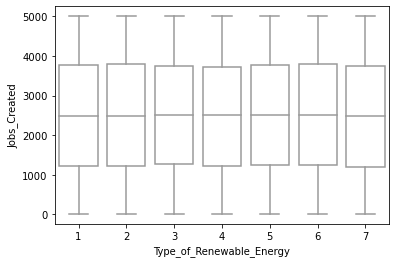

In [46]:
sns.boxplot(data=df, x = "Type_of_Renewable_Energy", y = "Jobs_Created", color='w')
plt.show()

Wniosek - Wykresy pudełkowe liczby utworzonych miejsc pracy w zależności od typu energii wyglądają praktycznie identycznie.
Mediana jest w okolicy 2500. Zatem najprawdopodobniej liczba utworzonych miejsc pracy w bardzo małym stopniu zależy od typu energii.

Wykres rocznej produkcji energii w megawatogodzinach w zależności od  poziomu integracji sieci

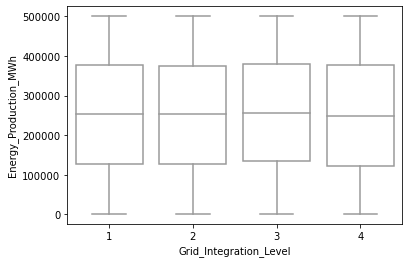

In [47]:
sns.boxplot(data=df, x = "Grid_Integration_Level", y = "Energy_Production_MWh", color='w')
plt.show()

Wniosek - Wykresy pudełkowe rocznej produkcji energii w megawatogodzinach w zależności od poziomu integracji sieci wyglądają praktycznie identycznie. Mediana jest w okolicy 250000 MWh. Zatem najprawdopodobniej roczna produkcja energii w bardzo małym stopniu zależy od poziomu integracji sieci.

### Wykresy wskazujące zależności w zbiorze danych z wnioskam

Wykres zależności minimalnej mocy w watach w zależności od typu energii odnawialnej

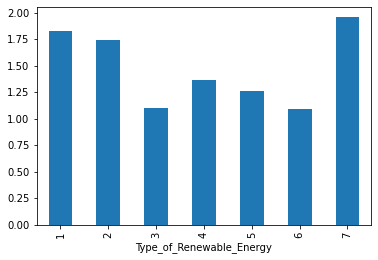

In [48]:
df.groupby('Type_of_Renewable_Energy').Installed_Capacity_MW.min().plot(kind = "bar")
plt.show()

Wniosek - Minimalna moc w watach jest najmniejsza dla energii hydroelektrycznej, a największa dla energii falowej.

---

Wykres zależności rocznej produkcji energii w MWh i wkaźnika redukcji zanieczyszczeń powietrza

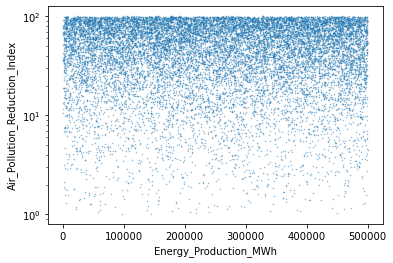

In [49]:
df.plot(x = "Energy_Production_MWh", y = "Air_Pollution_Reduction_Index", kind = "scatter", alpha = 0.5, logy = True, s = 0.3)
plt.show()

Wniosek - Wskaźnik redukcji zanieczyszczeń powietrza mało co zależy od rocznej produkcji energii, bo punkty są rozłożone w miarę równomiernie względem osi x.